In [ ]:
1. Understanding the Dataset

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# a) Load the dataset
df = pd.read_csv("C:/Users/sahaj/Downloads/bank_marketing_updated_v1.csv")

# b) Inspect the first few rows of the dataset
print(df.head())

   customerid   age  salary  balance  marital                  jobedu  \
0           1  58.0  100000     2143  married     management,tertiary   
1           2  44.0   60000       29   single    technician,secondary   
2           3  33.0  120000        2  married  entrepreneur,secondary   
3           4  47.0   20000     1506  married     blue-collar,unknown   
4           5  33.0       0        1   single         unknown,unknown   

  targeted default housing loan  contact  day      month duration  campaign  \
0      yes      no     yes   no  unknown    5  may, 2017  261 sec         1   
1      yes      no     yes   no  unknown    5  may, 2017  151 sec         1   
2      yes      no     yes  yes  unknown    5  may, 2017   76 sec         1   
3       no      no     yes   no  unknown    5  may, 2017   92 sec         1   
4       no      no      no   no  unknown    5  may, 2017  198 sec         1   

   pdays  previous poutcome response  
0     -1         0  unknown       no  
1     -1

In [119]:
# Check the structure of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

The dataset contains 45,211 records and 19 columns, including customer information, campaign characteristics, campaign timing, previous campaign information, and a target variable. The data types include numerical and categorical variables, with some missing values in the age, month, and response columns. The duration column should be converted from object to numeric. The target variable, response, has 30 missing values.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/sahaj/Downloads/bank_marketing_updated_v1.csv")

# Checking for missing values
print(df.isnull().sum())

# Checking for duplicate records
print(df.duplicated().sum())

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64
0


In [ ]:
Inspecting for any instances of missing values, outliers

In [4]:
import pandas as pd

missing_values = df.isnull().sum()
percentage_missing = (missing_values / len(df)) * 100

print(percentage_missing)


customerid    0.000000
age           0.044237
salary        0.000000
balance       0.000000
marital       0.000000
jobedu        0.000000
targeted      0.000000
default       0.000000
housing       0.000000
loan          0.000000
contact       0.000000
day           0.000000
month         0.110593
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome      0.000000
response      0.066356
dtype: float64


In [10]:
# Impute 'age' using median
df['age'].fillna(df['age'].median(), inplace=True)

# Impute 'month' using the most frequent value (mode)
df['month'].fillna(df['month'].mode()[0], inplace=True)

# Remove rows with missing 'response' values
df_cleaned = df.dropna(subset=['response'])

# Check the shape of the cleaned dataset
print(df_cleaned.shape)


(45181, 19)


1. Impute age Using Median:
Since age is numerical, imputing the missing values with the median is a good approach.

2. Impute month Based on Patterns:
You can impute month using the most frequent value (mode) or another method if you notice any temporal patterns.

3. Remove Rows with Missing response:
Since response is the target variable, it’s critical. Removing rows with missing values is typically the best option here.

In [6]:
# Calculate IQR for numerical columns
for col in ['age', 'salary', 'balance', 'day', 'campaign', 'pdays', 'previous']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"{col}: IQR = {IQR}, Outliers: {np.sum((df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR))}")

# Calculate Z-scores for numerical columns
for col in ['age', 'salary', 'balance', 'day', 'campaign', 'pdays', 'previous']:
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    print(f"{col}: Outliers: {np.sum(z_scores > 3)}")

age: IQR = 15.0, Outliers: 487
salary: IQR = 50000.0, Outliers: 0
balance: IQR = 1356.0, Outliers: 4729
day: IQR = 13.0, Outliers: 0
campaign: IQR = 2.0, Outliers: 3064
pdays: IQR = 0.0, Outliers: 8257
previous: IQR = 0.0, Outliers: 8257
age: Outliers: 381
salary: Outliers: 0
balance: Outliers: 745
day: Outliers: 0
campaign: Outliers: 840
pdays: Outliers: 1723
previous: Outliers: 582


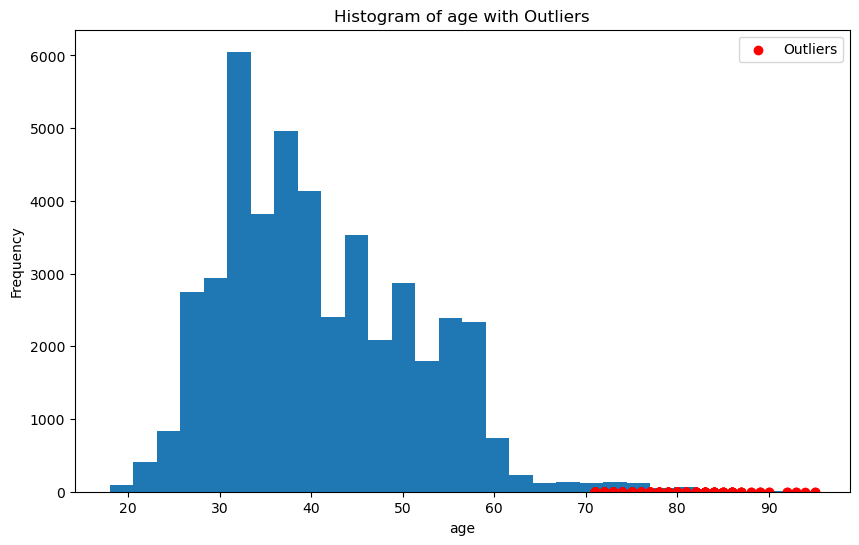

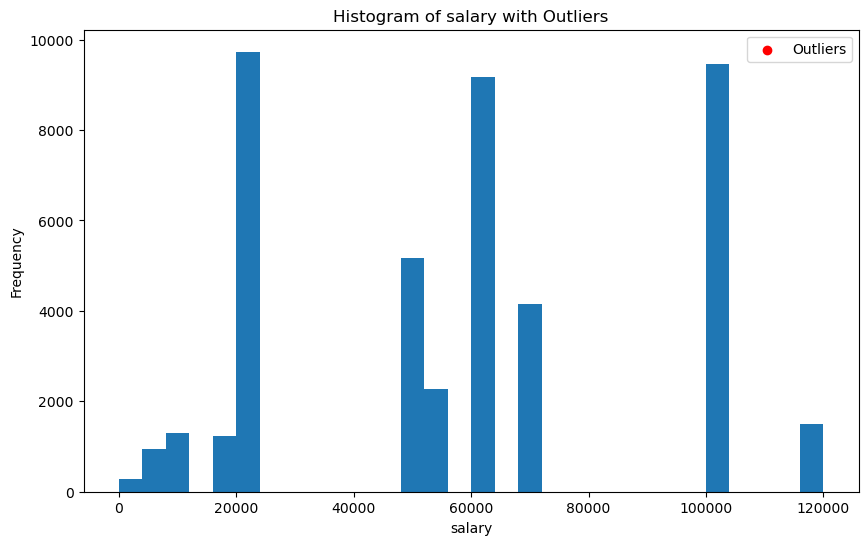

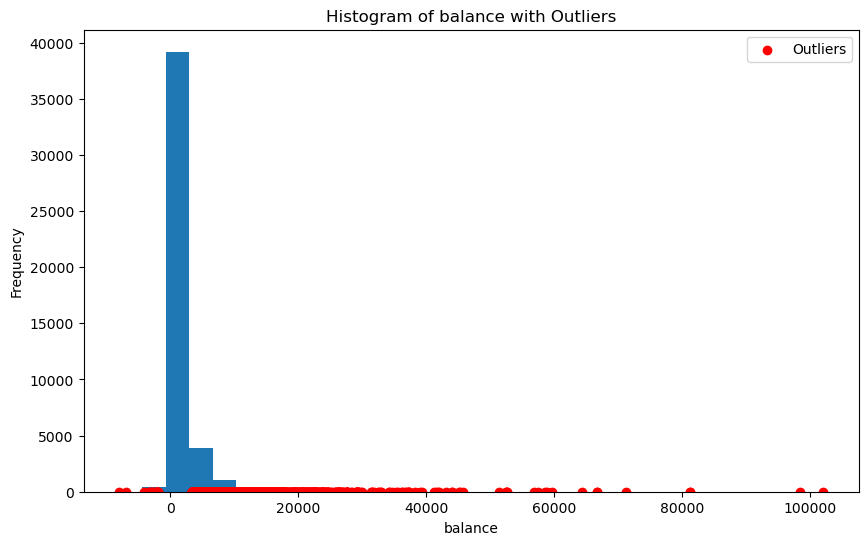

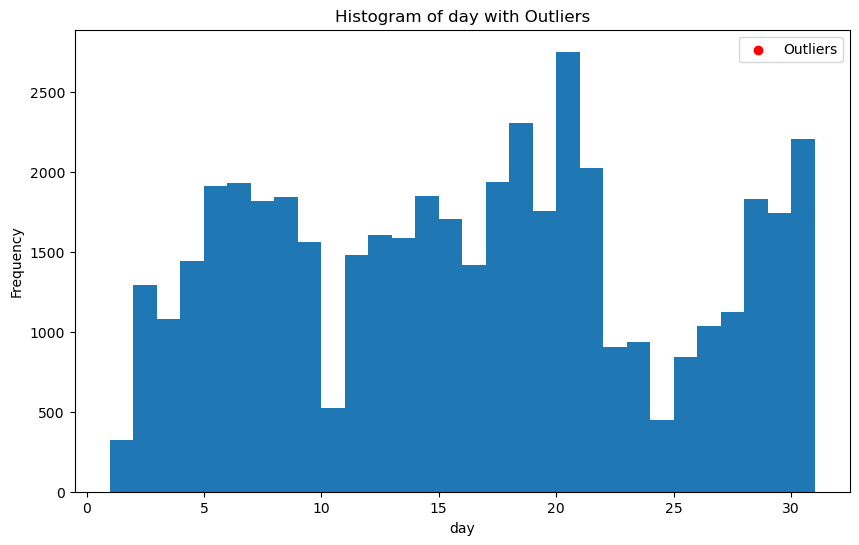

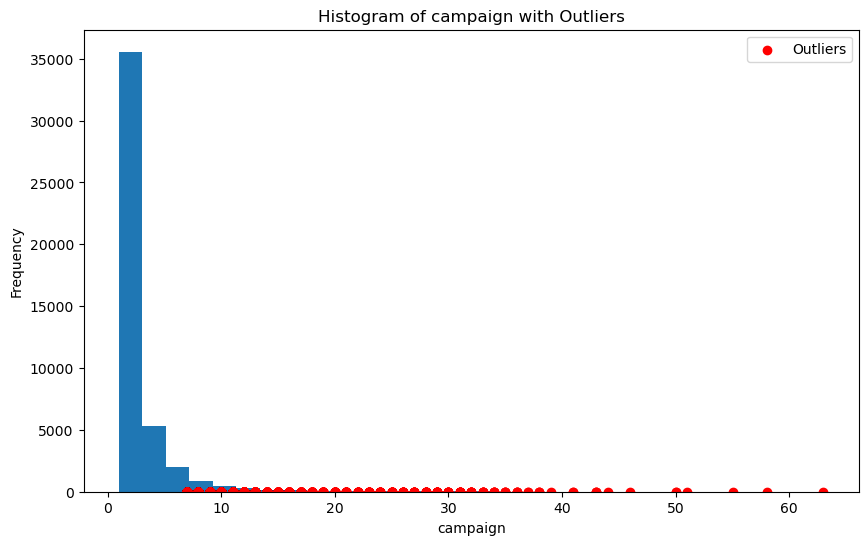

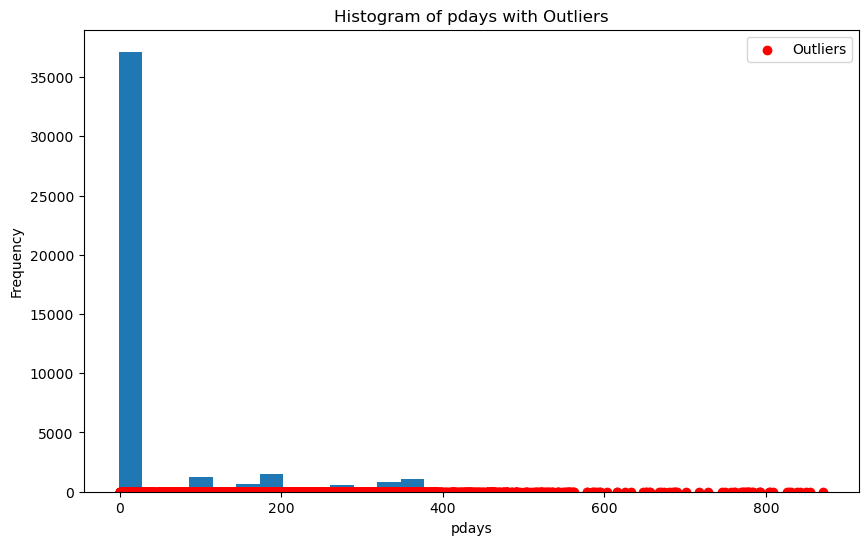

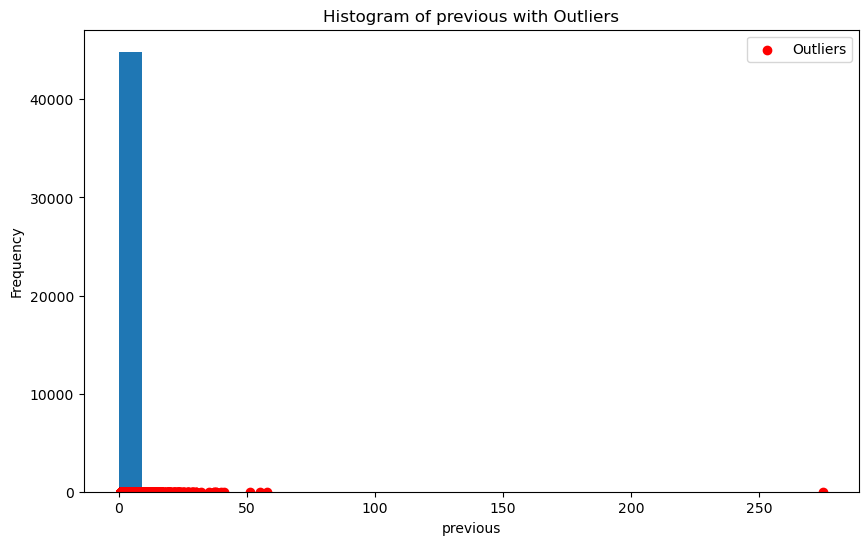

In [11]:
# Visualize distributions with outliers marked
def visualize_with_outliers(df, column_name):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column_name], bins=30)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name} with Outliers')

    # Mark outliers
    outliers = df[(df[column_name] < Q1 - 1.5 * IQR) | (df[column_name] > Q3 + 1.5 * IQR)]
    plt.scatter(outliers[column_name], np.zeros_like(outliers[column_name]), color='red', label='Outliers')
    plt.legend()
    plt.show()

# Calculate IQR and identify outliers for each variable
variables = ['age', 'salary', 'balance', 'day', 'campaign', 'pdays', 'previous']
for variable in variables:
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[variable] < Q1 - 1.5 * IQR) | (df[variable] > Q3 + 1.5 * IQR)]

    # Visualize with outliers marked
    visualize_with_outliers(df, variable)


The analysis identified outliers in several variables:

- Age: 487 customers with extreme ages (very young or old)
- Balance: 4,729 customers with unusually high or low account balances
- Campaign: 3,064 customers contacted an unusually high number of times
- Pdays: 8,257 customers contacted after a significant delay
- Previous: 8,257 customers with multiple contacts from past campaigns

No outliers were found in:

- Salary
- Day (uniform distribution throughout the month)

Insights:

High number of outliers in balance, campaign, pdays, and previous variables, suggesting a need for careful handling in analysis.
No salary or day outliers, indicating stable data for these fields.
Outlier handling (e.g., winsorization or removal) is important for features like age, balance, and campaign, which exhibit a large number of outliers and could skew results if not addressed.

To handle outliers, removal (deleting rows that contain extreme values).

In [12]:
# Function to remove outliers based on IQR
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Remove outliers in 'age', 'balance', and 'campaign' columns
df_no_outliers = df.copy()
df_no_outliers = remove_outliers(df_no_outliers, 'age')
df_no_outliers = remove_outliers(df_no_outliers, 'balance')
df_no_outliers = remove_outliers(df_no_outliers, 'campaign')

# Check the shape of the dataset after removing outliers
print(df_no_outliers.shape)

(37280, 22)


C:\Users\sahaj\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\sahaj\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [ ]:
2. Descriptive Statistics

In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/sahaj/Downloads/bank_marketing_updated_v1.csv")
df.describe()

print(df.describe())

         customerid           age         salary        balance           day  \
count  45211.000000  45191.000000   45211.000000   45211.000000  45211.000000   
mean   22606.000000     40.935651   57006.171065    1362.272058     15.806419   
std    13051.435847     10.619198   32085.718415    3044.765829      8.322476   
min        1.000000     18.000000       0.000000   -8019.000000      1.000000   
25%    11303.500000     33.000000   20000.000000      72.000000      8.000000   
50%    22606.000000     39.000000   60000.000000     448.000000     16.000000   
75%    33908.500000     48.000000   70000.000000    1428.000000     21.000000   
max    45211.000000     95.000000  120000.000000  102127.000000     31.000000   

           campaign         pdays      previous  
count  45211.000000  45211.000000  45211.000000  
mean       2.763841     40.197828      0.580323  
std        3.098021    100.128746      2.303441  
min        1.000000     -1.000000      0.000000  
25%        1.000000 

Analysis of Descriptive Statistics:
Customer Information:

Age:

Mean: 40.94 years, with a standard deviation of 10.62 years.
Range: The youngest customer is 18, and the oldest is 95.
Insight: The age distribution is relatively wide, with a median of 39 years, indicating a middle-aged customer base, but a significant spread (indicated by the standard deviation) suggests a diverse range of customers.
Salary:

Mean: $57,006, with a standard deviation of $32,085.
Range: Salary ranges from $0 to $120,000.
Insight: The wide salary range implies varying levels of financial capacity among customers, with a median of $60,000, which indicates that half of the customers earn more than this.
Balance:

Mean: $1,362, with a standard deviation of $3,045.
Range: Balances vary from -$8,019 to $102,127.
Insight: The negative minimum balance indicates some customers have overdrafts, while a few have exceptionally high balances. The median is $448, which suggests that most customers have relatively small savings or checking account balances, with extreme values skewing the mean upwards.
Campaign Information:

Day:

Mean: 15.81, with a standard deviation of 8.32.
Range: The campaign contacts customers between the 1st and 31st of the month.
Insight: There appears to be a uniform distribution of contact days, with no significant clustering around specific dates.
Campaign:

Mean: 2.76 contacts per customer, with a standard deviation of 3.10.
Range: Customers were contacted between 1 and 63 times.
Insight: While the median number of contacts is 2, indicating most customers were contacted only a few times, the maximum of 63 indicates that some customers were contacted frequently, which could suggest over-contacting and possibly decreasing customer satisfaction.
Previous Campaign Interactions:

Pdays:
Mean: 40.2, with a large standard deviation of 100.1.
Range: The values vary from -1 (indicating no prior contact) to 871 days.
Insight: Most customers haven't been contacted previously (as indicated by the 25th, 50th, and 75th percentiles all being -1). However, a small group has been contacted in the past after long gaps.
Previous:
Mean: 0.58 previous contacts, with a standard deviation of 2.30.
Range: Customers had between 0 and 275 previous interactions.
Insight: A significant portion of customers have had no prior contact (as shown by the median value of 0), but there are outliers with extensive previous interactions.

Key Insights:

Demographic Insights: The average age of the customer base is around 41, indicating a predominantly middle-aged demographic. However, a wide range of ages suggests the campaign targets both young and elderly customers.
Economic Insights: The salary and balance statistics show a skewed distribution, with a small subset of customers holding substantial balances and high salaries, while the majority have lower balances and incomes.
Campaign Insights: While the median number of contacts is low, extreme outliers (up to 63 contacts) suggest the need to monitor over-contacting, which could negatively affect campaign success.
Previous Campaign History: Most customers have not been contacted in prior campaigns, indicating a focus on new outreach, but a subset has been re-engaged after significant delays, warranting a targeted approach.

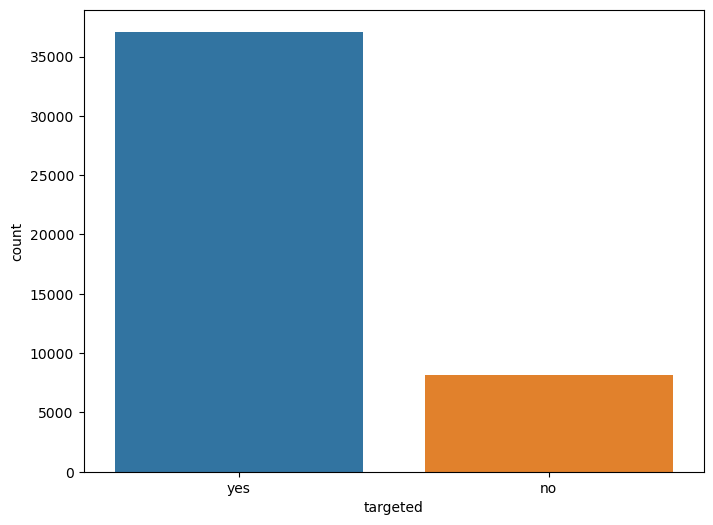

In [14]:
#Examine the distribution of the target variable, indicating responses to the term deposit campaign.

import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical columns
summary_stats = df.describe()

# Distribution of the target variable
target_distribution = df['targeted'].value_counts()

# Visualizing the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='targeted', data=df)
plt.show()

The majority of observations belong to the "yes" category, with a much smaller number of observations in the "no" category.

From the plot, we can observe the following:

Majority "yes": A significantly larger number of individuals were targeted compared to those who were not.
Class Imbalance: There is a clear class imbalance, with "yes" being the dominant class. This might impact the performance of machine learning models if not addressed appropriately.

In [ ]:
3. Univariate Analysis of Key Features - 

i. age: Age of the customer
ii. balance: Bank balance of the customer
iii. duration: Duration of the call


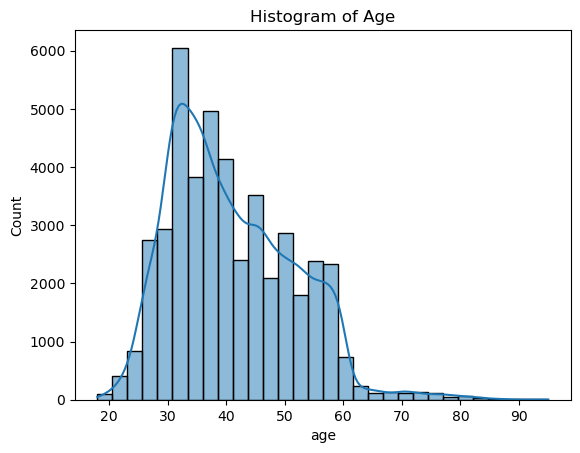

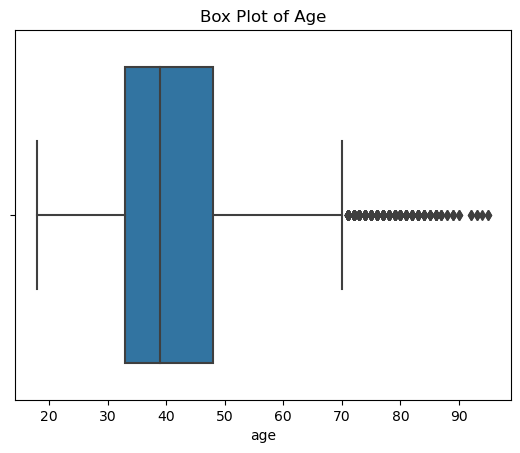

In [13]:
#Age

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Histogram of Age')
plt.show()

# Box plot
sns.boxplot(x=df['age'])
plt.title('Box Plot of Age')
plt.show()

Analyzing the Age Distribution

The histogram shows the distribution of the age variable. We can observe the following:

Skewness: The distribution is slightly right-skewed, indicating a longer tail on the right side. This means there are a few older individuals compared to the majority of the data.
Mode: The most frequent age group appears to be around 30-35 years old.
Range: The age range is approximately from 20 to 90 years old.
Box Plot

The box plot provides a summary of the distribution and helps identify outliers:

Median: The median age is around 40 years old.
Interquartile Range (IQR): The IQR, represented by the box, is relatively small, indicating a concentrated middle portion of the data.
Outliers: There are a few outliers on the higher end of the age distribution, indicated by the dots above the upper whisker. These might represent individuals who are significantly older than the majority of the population.

Key Insights:

Age Demographics: The data appears to be primarily focused on individuals in their 20s, 30s, and 40s.
Skewness: The right-skewness suggests that there are some older individuals, but they are less frequent.
Outliers: The presence of outliers on the higher end might indicate specific groups or demographics within the data.

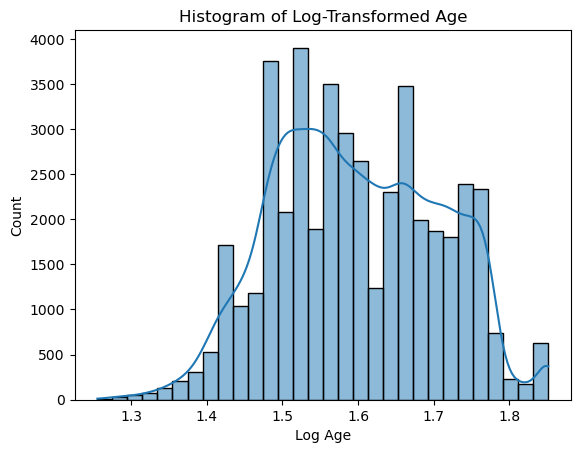

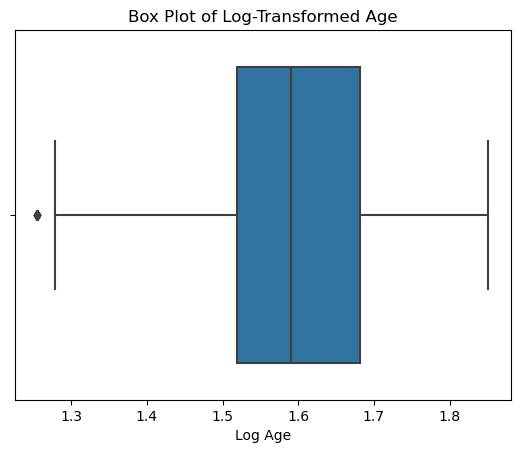

In [27]:
# Apply log transformation (base 10)
df['log_age'] = np.log10(df['age'])

# Visualize the transformed data
sns.histplot(df['log_age'], bins=30, kde=True)
plt.title('Histogram of Log-Transformed Age')
plt.xlabel('Log Age')
plt.show()

sns.boxplot(x=df['log_age'])
plt.title('Box Plot of Log-Transformed Age')
plt.xlabel('Log Age')
plt.show()

Log-Transformed Age Distribution


The histogram shows the distribution of the log-transformed age variable. We can observe the following:

Shape: The distribution is now more symmetrical and bell-shaped compared to the original distribution. This indicates that the log transformation has helped reduce the right-skewness.
Central Tendency: The peak of the distribution is around 1.5-1.6, suggesting that the majority of individuals have log-transformed ages within this range.
Spread: The spread of the data seems to have decreased, as evidenced by the narrower shape of the histogram.
Box Plot

The box plot provides a summary of the log-transformed age distribution:

Median: The median log-transformed age is around 1.6.
Interquartile Range (IQR): The IQR is relatively small, indicating a concentrated middle portion of the data.
Outliers: There is a single outlier on the lower end of the distribution.
Key Insights:

Transformation Effectiveness: The log transformation has successfully reduced the right-skewness of the age distribution, making it more suitable for certain statistical analyses or machine learning models.
Central Tendency: The majority of individuals have log-transformed ages between 1.5 and 1.6.
Outliers: There is a single outlier on the lower end, which might be worth investigating further.

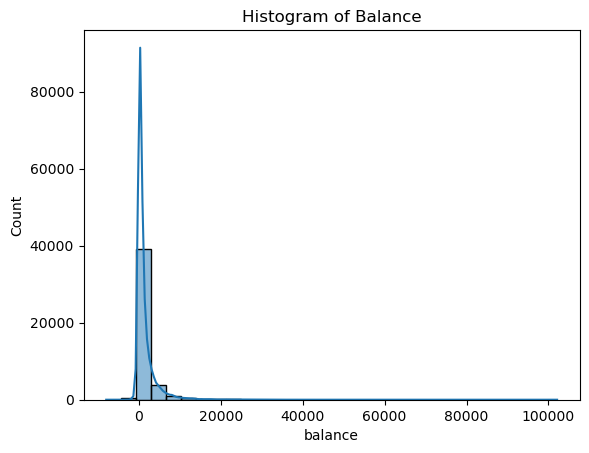

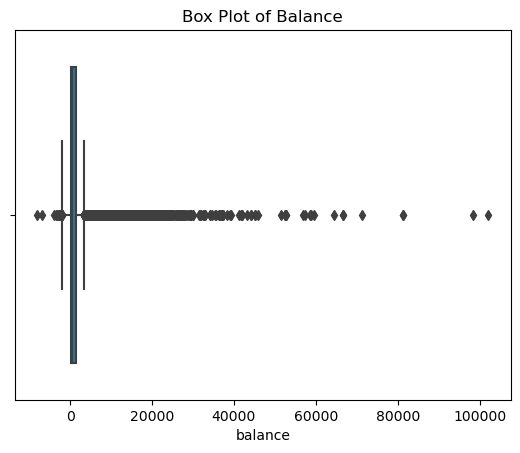

In [28]:
#Balance

sns.histplot(df['balance'], bins=30, kde=True)
plt.title('Histogram of Balance')
plt.show()

sns.boxplot(x=df['balance'])
plt.title('Box Plot of Balance')
plt.show()

In [ ]:
Analyzing the Balance Distribution
Histogram

The histogram shows the distribution of the balance variable:

Skewness: The distribution is heavily right-skewed, indicating a long tail on the right side. This means there are a few individuals with significantly higher balances compared to the majority.
Peak: The peak of the distribution is around 0, suggesting that a large number of individuals have low or no balances.
Range: The balance values range from negative values (potentially indicating debt) to relatively high positive values.
Box Plot

The box plot provides a summary of the distribution:

Median: The median balance is around 448.
Interquartile Range (IQR): The IQR is relatively small, indicating a concentrated middle portion of the data.
Outliers: There are several outliers on the higher end of the distribution, indicated by the dots above the upper whisker.
    
Key Insights:

Distribution: The balance distribution is heavily skewed to the right, with a concentration of individuals having low or no balances.
Outliers: The presence of outliers on the higher end suggests that there are a few individuals with exceptionally high balances.
Negative Balances: The negative values in the balance column indicate that some individuals might have debt.

C:\Users\sahaj\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sahaj\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


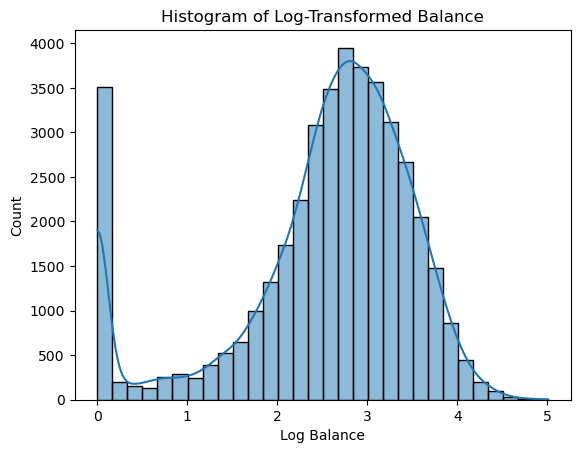

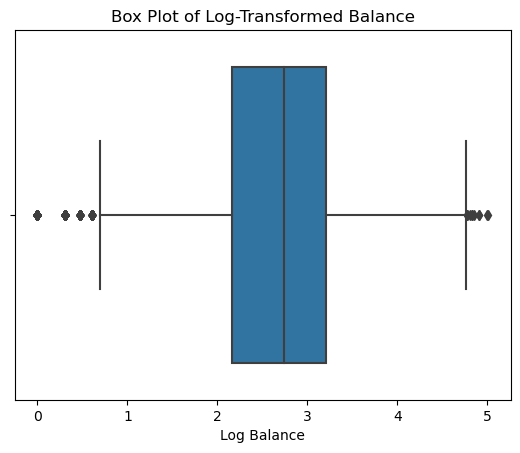

In [95]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Applying log transformation (base 10)

df['log_balance'] = np.log10(df['balance'] + 1)  # Add 1 to avoid log(0)

# Visualizing the transformed data
sns.histplot(df['log_balance'], bins=30, kde=True)
plt.title('Histogram of Log-Transformed Balance')
plt.xlabel('Log Balance')
plt.show()

sns.boxplot(x=df['log_balance'])
plt.title('Box Plot of Log-Transformed Balance')
plt.xlabel('Log Balance')
plt.show()

In [ ]:
Analyzing the Log-Transformed Balance Distribution
Histogram

The histogram shows the distribution of the log-transformed balance variable:

Shape: The distribution is now more symmetrical and bell-shaped compared to the original distribution. This indicates that the log transformation has helped reduce the right-skewness.
Central Tendency: The peak of the distribution is around 2-3, suggesting that the majority of individuals have log-transformed balances within this range.
Spread: The spread of the data seems to have decreased, as evidenced by the narrower shape of the histogram.
Box Plot

The box plot provides a summary of the log-transformed balance distribution:

Median: The median log-transformed balance is around 2.5.
Interquartile Range (IQR): The IQR is relatively small, indicating a concentrated middle portion of the data.
Outliers: There are a few outliers on both the lower and upper ends of the distribution.
    
Key Insights:

Transformation Effectiveness: The log transformation has successfully reduced the right-skewness of the balance distribution, making it more suitable for certain statistical analyses or machine learning models.
Central Tendency: The majority of individuals have log-transformed balances between 2 and 3.
Outliers: The presence of outliers on both ends might indicate specific groups or demographics with unusually low or high balances.

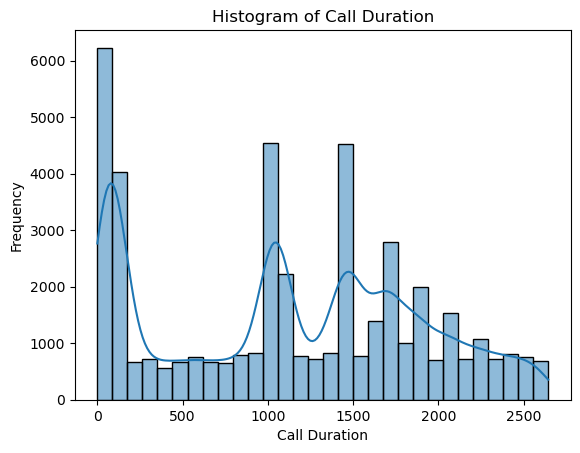

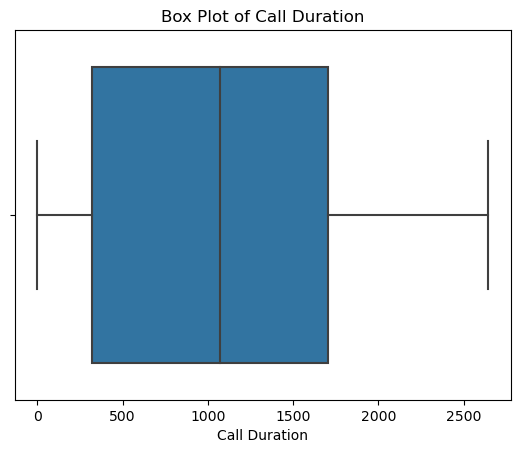

In [30]:
#Duration

# Create a histogram with kernel density estimation

df['duration'] = pd.Categorical(df['duration']).codes

sns.histplot(df['duration'], bins=30, kde=True)
plt.title('Histogram of Call Duration')
plt.xlabel('Call Duration')  # Add labels for clarity
plt.ylabel('Frequency')
plt.show()

#Create a box plot

sns.boxplot(x=df['duration'])
plt.title('Box Plot of Call Duration')
plt.xlabel('Call Duration')  # Add labels for clarity
plt.show()



Analyzing the Call Duration Distribution

Histogram

The histogram shows the distribution of the call_duration variable:

Shape: The distribution is right-skewed, with a longer tail on the right side. This indicates that there are a few longer calls compared to the majority.
Peak: The peak of the distribution is around 1000 seconds (approximately 16 minutes).
Range: The call durations range from 0 to around 2500 seconds (about 42 minutes).
Box Plot

The box plot provides a summary of the distribution:

Median: The median call duration is around 1000 seconds (16 minutes).
Interquartile Range (IQR): The IQR is relatively small, indicating a concentrated middle portion of the data.
Outliers: There are a few outliers on the higher end of the distribution, suggesting some unusually long calls.
    
Key Insights:

Distribution: The call duration distribution is right-skewed, with a concentration of shorter calls and a few longer calls.
Central Tendency: The median call duration is around 16 minutes.
Outliers: The presence of outliers on the higher end might indicate specific types of calls or customer interactions.

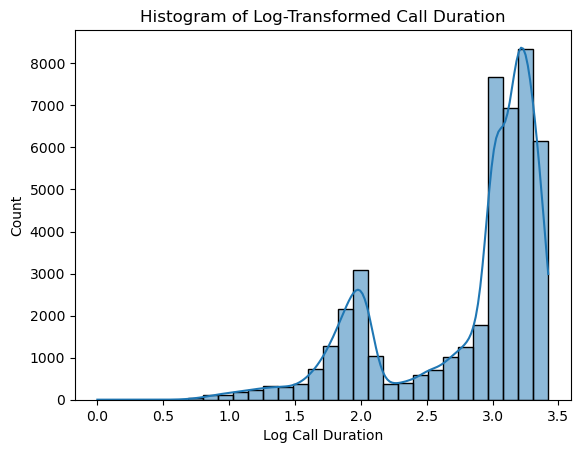

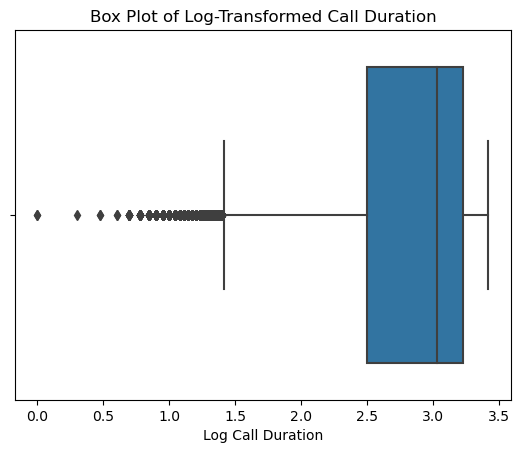

In [32]:
# Applying log transformation (base 10)

df['log_Duration'] = np.log10(df['duration'] + 1)  

# Add 1 to avoid log(0)

# Visualizing the transformed data
sns.histplot(df['log_Duration'], bins=30, kde=True)
plt.title('Histogram of Log-Transformed Call Duration')
plt.xlabel('Log Call Duration')
plt.show()

sns.boxplot(x=df['log_Duration'])
plt.title('Box Plot of Log-Transformed Call Duration')
plt.xlabel('Log Call Duration')
plt.show()

Log-Transformed Call Duration Distribution
Histogram

The histogram shows the distribution of the log-transformed call_duration variable:

Shape: The distribution is now more symmetrical and bell-shaped compared to the original distribution. This indicates that the log transformation has helped reduce the right-skewness.
Central Tendency: The peak of the distribution is around 2.5, suggesting that the majority of individuals have log-transformed call durations within this range.
Spread: The spread of the data seems to have decreased, as evidenced by the narrower shape of the histogram.
Box Plot

The box plot provides a summary of the log-transformed call_duration distribution:

Median: The median log-transformed call duration is around 2.5.
Interquartile Range (IQR): The IQR is relatively small, indicating a concentrated middle portion of the data.
Outliers: There are a few outliers on the lower end of the distribution.
    
Key Insights:

Transformation Effectiveness: The log transformation has successfully reduced the right-skewness of the call_duration distribution, making it more suitable for certain statistical analyses or machine learning models.
Central Tendency: The majority of individuals have log-transformed call durations between 2 and 3.
Outliers: The presence of outliers on the lower end might indicate specific types of calls or customer interactions.

In [ ]:
4. Bivariate Analysis: 
Exploring Relationships - 
Target Variable: response (whether the customer subscribed to a term deposit)
Independent Variables: age, job, education, marital

1. Age Vs Response

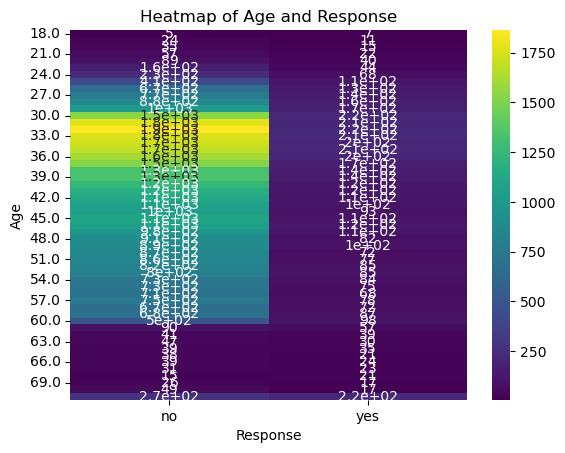

This heatmap will show how the distribution of responses (yes/no) varies across different age groups. Look for patterns or trends.


In [34]:

import seaborn as sns
import matplotlib.pyplot as plt

# Group by age and response, then count the occurrences
grouped_data = df.groupby(['age', 'response']).size().reset_index(name='count')

# Create a pivot table
pivot_table = grouped_data.pivot_table(index='age', columns='response', values='count', fill_value=0)

# Heatmap
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Heatmap of Age and Response')
plt.xlabel('Response')
plt.ylabel('Age')
plt.show()

print("This heatmap will show how the distribution of responses (yes/no) varies across different age groups. Look for patterns or trends.")



Key Observations:

Age Distribution: The heatmap shows that the majority of observations fall within the age range of 30 to 45.
Response Patterns: The color intensity reveals that a higher number of individuals within the age range of 30 to 45 have responded positively ("yes").

Age-Specific Trends: There appear to be some variations in response rates across different age groups. For example, the age group 30-33 seems to have a particularly high proportion of positive responses.

Insight:

Targeted Marketing: The heatmap suggests that the age group of 30-45 might be a particularly effective target for marketing campaigns or promotions.


In [61]:
#Analyzing and Categorizing Job Data

def split_job_and_education(jobedu):
  jobs, education = jobedu.split(',')
  return jobs, education

df['jobs'] = df['jobedu'].apply(split_job_and_education).str[0]
df['education'] = df['jobedu'].apply(split_job_and_education).str[1]

In [ ]:
Jobs Vs Response

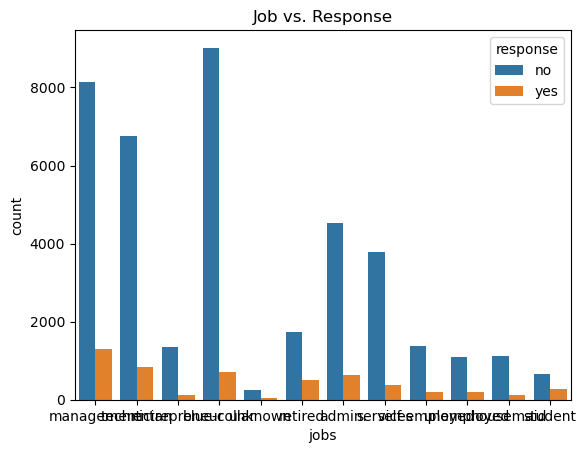

This bar chart will show the distribution of responses for each job category.


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='jobs', hue='response', data=df)
plt.title('Job vs. Response')
plt.show()

print("This bar chart will show the distribution of responses for each job category.")

Analyzing the Job vs. Response Plot
Interpretation:

The plot visualizes the relationship between the jobs variable and the response variable. The x-axis represents the different job categories, and the y-axis represents the count of individuals within each job category and response type.

Key Observations:

Job Distribution: The most common jobs appear to be "management" and "blue-collar."
Response Patterns: The plot shows that certain jobs might have a higher or lower propensity to respond positively ("yes"). For example, "management" and "technician" seem to have a relatively higher proportion of positive responses.
Class Imbalance: Within each job category, there might be a class imbalance between "no" and "yes" responses.

Insights:

Targeted Marketing: The plot suggests that certain job categories might be more receptive to marketing campaigns or promotions.
Customer Segmentation: You could segment your customers based on their jobs to tailor marketing strategies or product offerings.

In [ ]:
Education Vs Response

In [15]:
print(df['education'].value_counts())

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


In [31]:
# Assuming your DataFrame is named 'df'

def categorize_education(education_level):
  if education_level in ['secondary', 'tertiary']:
    return 'educated'
  elif education_level == 'primary':
    return 'uneducated'
  else:
    return 'unknown'

df['Qualification'] = df['education'].apply(categorize_education)

In [255]:
df.head

<bound method NDFrame.head of        customerid   age  salary  balance   marital                  jobedu  \
0               1  58.0  100000     2143   married     management,tertiary   
1               2  44.0   60000       29    single    technician,secondary   
2               3  33.0  120000        2   married  entrepreneur,secondary   
3               4  47.0   20000     1506   married     blue-collar,unknown   
4               5  33.0       0        1    single         unknown,unknown   
...           ...   ...     ...      ...       ...                     ...   
45206       45207  51.0   60000      825   married     technician,tertiary   
45207       45208  71.0   55000     1729  divorced         retired,primary   
45208       45209  72.0   55000     5715   married       retired,secondary   
45209       45210  57.0   20000      668   married   blue-collar,secondary   
45210       45211  37.0  120000     2971   married  entrepreneur,secondary   

      targeted default housing lo

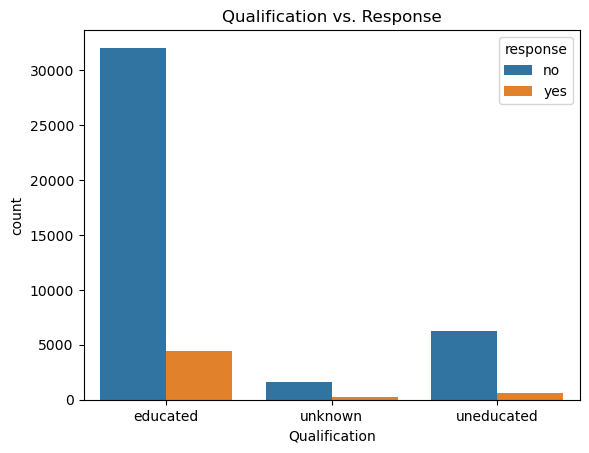

This bar chart will show the distribution of responses for each education level


In [256]:
sns.countplot(x='Qualification', hue='response', data=df)
plt.title('Qualification vs. Response')
plt.show()

print("This bar chart will show the distribution of responses for each education level")

Analyzing the Qualification vs. Response Plot
Interpretation:

The plot visualizes the relationship between the qualification variable and the response variable. The x-axis represents the different qualification categories, and the y-axis represents the count of individuals within each qualification category and response type.

Key Observations:

Qualification Distribution: The majority of individuals have an "educated" qualification, followed by "unknown" and "uneducated."
Response Patterns: The plot shows that individuals with an "educated" qualification have a higher proportion of positive responses ("yes") compared to those with "unknown" or "uneducated" qualifications.


Targeted Marketing: The plot suggests that individuals with an "educated" qualification might be a more receptive target for marketing campaigns or promotions.
Customer Segmentation: You could segment your customers based on their qualifications to tailor marketing strategies or product offerings.


In [ ]:
Marital Vs Response

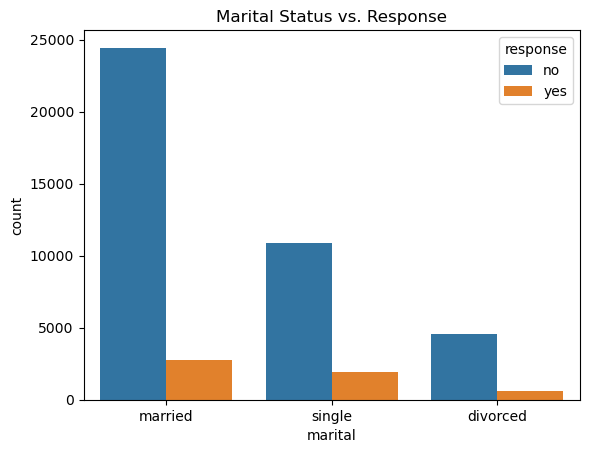

This bar chart will show the distribution of responses for each marital status


In [254]:
sns.countplot(x='marital', hue='response', data=df)
plt.title('Marital Status vs. Response')
plt.show()

print("This bar chart will show the distribution of responses for each marital status")

Analyzing the Marital Status vs. Response Plot
Interpretation:

The plot visualizes the relationship between the marital variable and the response variable. The x-axis represents the different marital statuses, and the y-axis represents the count of individuals within each marital status and response type.

Key Observations:

Marital Status Distribution: The majority of individuals are married, followed by single and divorced.
Response Patterns: The plot shows that married individuals have a slightly higher proportion of positive responses ("yes") compared to single or divorced individuals. However, the differences are not as pronounced as in some of the other categorical variables.
Targeted Marketing: While there might be some slight differences in response rates based on marital status.


5. Categorical Variables Analysis

Relevant columns: job, qualification, marital, response (target variable)

Investigating Distributions

In [ ]:
1. Job Type

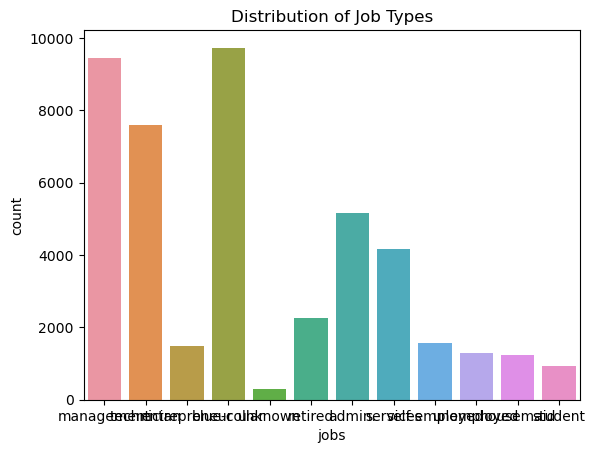

In [157]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='jobs', data=df)
plt.title('Distribution of Job Types')
plt.show()

Analyzing the Distribution of Job Types
Interpretation:

The bar plot illustrates the distribution of the jobs variable. The x-axis represents the different job categories, and the y-axis represents the count of individuals within each job category.

Key Observations:

Job Distribution: The most common jobs appear to be "management" and "technician," followed by "blue-collar" and "retired."
Job Frequency: Some job categories have relatively low frequencies, such as "unknown" and "housemaid."
Insights:

Customer Segmentation: The distribution of job types can provide insights into the target audience for your products or services.
Marketing Targeting: You could tailor your marketing efforts to specific job categories based on their prevalence in your dataset.

2. Qualification

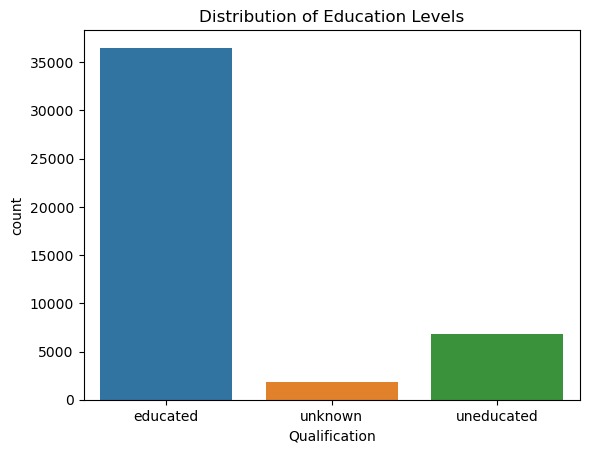

In [160]:
sns.countplot(x='Qualification', data=df)
plt.title('Distribution of Education Levels')
plt.show()

Analyzing the Distribution of Education Levels
Interpretation:

The bar plot illustrates the distribution of the qualification variable. The x-axis represents the different education levels, and the y-axis represents the count of individuals within each level.

Key Observations:

Dominant Level: The "educated" category has the highest frequency, indicating that a majority of individuals have some form of education.
Unknown Level: A significant number of individuals have an "unknown" education level. This might be due to missing or incomplete data.
Uneducated Level: A smaller proportion of individuals have an "uneducated" qualification.

In [ ]:
3. Marital Status

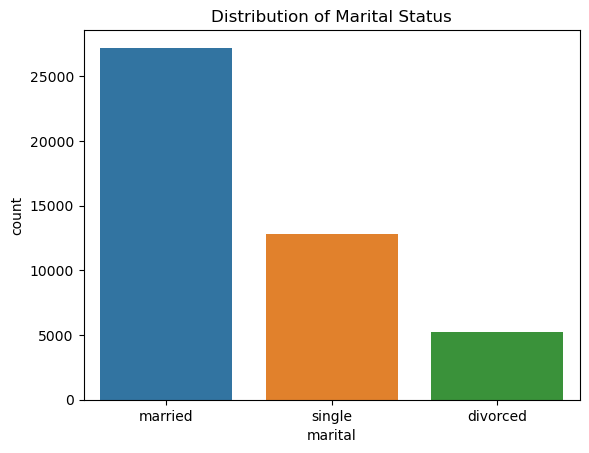

In [161]:
sns.countplot(x='marital', data=df)
plt.title('Distribution of Marital Status')
plt.show()

Analyzing the Distribution of Marital Status
Interpretation:

The bar plot illustrates the distribution of the marital variable. The x-axis represents the different marital statuses, and the y-axis represents the count of individuals within each marital status.

Key Observations:

Dominant Status: The "married" category has the highest frequency, indicating that a majority of individuals are married.
Single and Divorced: A smaller proportion of individuals are single or divorced.

In [ ]:
5. Temporal Analysis

In [68]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Combine the columns into a single string
df['date_string'] = df['day'].astype(str) + ' ' + df['month']

# Convert the string to a datetime object
df['date'] = pd.to_datetime(df['date_string'])

# Drop the intermediate 'date_string' column if needed
df.drop(columns=['date_string'], inplace=True)

C:\Users\sahaj\AppData\Local\Temp\ipykernel_18892\2358755074.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date_string'])


In [69]:
df['monthwise'] = df['date'].dt.month_name()
df['yearwise'] = df['date'].dt.year

In [ ]:
Month-wise Analysis

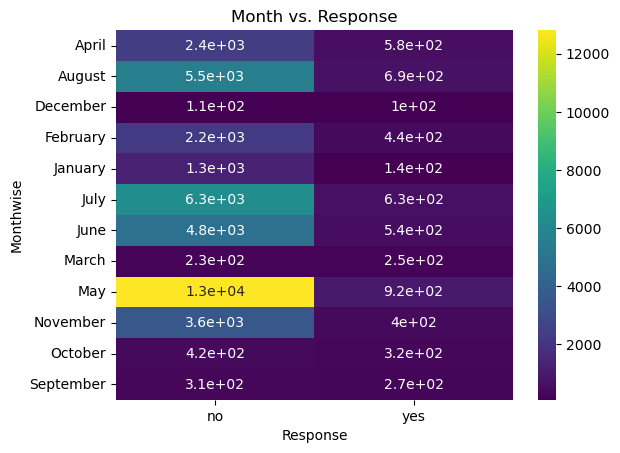

This heatmap will show the number of subscriptions and non-subscriptions for each month.


In [44]:
import seaborn as sns

# Group by month and response
grouped_data = df.groupby(['monthwise', 'response']).size().reset_index(name='count')

# Create a pivot table
pivot_table = grouped_data.pivot_table(index='monthwise', columns='response', values='count', fill_value=0)

# Heatmap
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Month vs. Response')
plt.xlabel('Response')
plt.ylabel('Monthwise')
plt.show()

print("This heatmap will show the number of subscriptions and non-subscriptions for each month.")

Analyzing the Month vs. Response Heatmap

Interpretation:

The heatmap visualizes the relationship between the month variable and the response variable. The x-axis represents the response categories ("no" and "yes"), and the y-axis represents the different months. The color intensity in each cell indicates the number of observations within that specific month and response category.

Key Observations:

Month-Specific Response Patterns: The heatmap shows that certain months might have higher or lower proportions of positive responses ("yes"). For example, "May" appears to have a significantly higher number of positive responses compared to other months.
Seasonal Trends: There might be seasonal patterns in the response rates. For example, you could analyze if certain months consistently have higher or lower response rates.


Targeted Marketing: The heatmap can help you identify months with higher response rates and tailor your marketing efforts accordingly.
Seasonal Promotions: Consider implementing seasonal promotions or campaigns based on the observed trends in response rates.

Year vs. Response

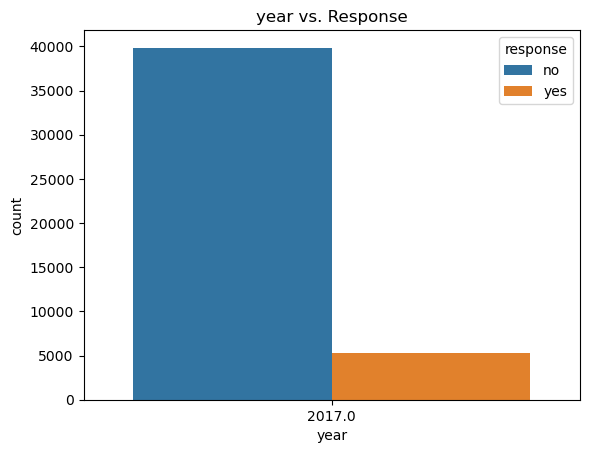

This countplot will show the distribution of responses for the year.


In [237]:
sns.countplot(x='year', hue='response', data=df)
plt.title('year vs. Response')
plt.show()
print("This countplot will show the distribution of responses for the year.")

Analyzing the Year vs. Response Plot
Interpretation:

The plot visualizes the relationship between the year variable (likely representing the year of the observation) and the response variable. The x-axis shows the year (2017.0 in this case), and the y-axis represents the count of observations within that year and response type.

Key Observations:

Single Year: The plot indicates that the data is likely from a single year (2017).
Response Patterns: The plot shows the distribution of responses within that year.
Class Imbalance: There appears to be a significant class imbalance, with "no" responses being much more frequent than "yes" responses.

In [ ]:
7. Feature Engineering
Creating New Features

In [ ]:
1. Age Groups:

In [238]:
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, np.inf], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+'])

In [ ]:
2. Income Categories:

In [76]:
df['income_category'] = pd.qcut(df['salary'], q=3, labels=['low', 'medium', 'high'])

In [ ]:
Encoding Categorical Variables

In [ ]:
categorical columns - 

marital
jobedu
targeted
default
housing
loan
contact
month
poutcome

In [91]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming your DataFrame is named 'df'
categorical_cols = ['marital', 'jobedu', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# One-hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
encoded_data = onehot_encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out())

# Concatenate encoded data with original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop original categorical columns
df.drop(categorical_cols, axis=1, inplace=True)

C:\Users\sahaj\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Introducing New Features

Age Groups: Instead of using raw age values, creating age groups can capture patterns within specific age ranges. The provided code effectively groups ages into categories like "18-25," "26-35," "36-45," "46-55," "56-65," and "66+.

Income Categories: Grouping income into categories like "low," "medium," and "high" can help capture trends related to income levels. The code uses pd.qcut to create three equal-sized income categories based on the salary column.

Encoding Categorical Variables -

Categorical variables, such as "job" or "marital status," cannot be directly used by many machine learning algorithms. Encoding techniques convert these categorical values into numerical representations that the model can understand.

The provided code effectively applies one-hot encoding to the specified categorical columns, creating binary columns for each category. This is suitable for nominal variables without a natural order.

Correlation Analysis
We can identify the following numerical columns that can be analyzed for correlations:

age
salary
balance
day
campaign
pdays
previous

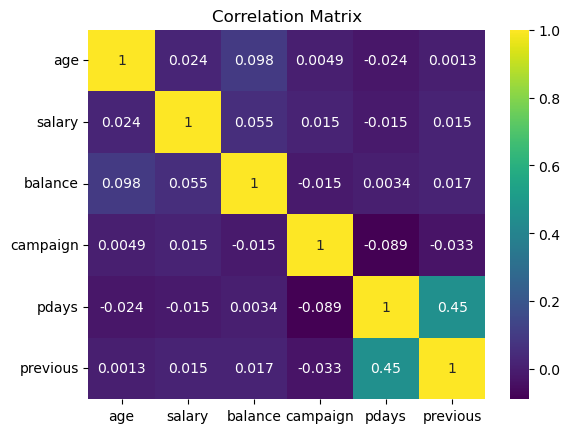

In [96]:
numerical_columns = ['age', 'salary', 'balance', 'campaign', 'pdays', 'previous']
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()


Understanding the Correlation Matrix:

A correlation matrix is a table showing the correlation coefficients between pairs of variables. In this case, the matrix represents the relationships between the following variables:

age: The age of the individual
salary: The annual salary of the individual
balance: The average account balance
campaign: The number of contacts performed during the current marketing campaign
pdays: The number of days that passed after the last contact from a previous marketing campaign
previous: The number of contacts performed before the current marketing campaign
Key Observations from the Matrix:

Strong Positive Correlation:

Salary and Balance: There's a strong positive correlation between salary and balance. This suggests that individuals with higher salaries tend to have higher average account balances.
Moderate Positive Correlation:

Previous Contacts and pdays: A moderate positive correlation exists between previous contacts and pdays. This might indicate that individuals who have been contacted more frequently in the past are more likely to be contacted again in the future.
Weak or No Correlation:

Age and Other Variables: Age seems to have weak or no correlation with the other variables. This suggests that age is not a significant predictor of the other factors.
Campaign and Other Variables: The campaign variable also shows weak or no correlation with the other variables. This could be due to various factors, such as the campaign's effectiveness or the randomness of contact attempts.

In [ ]:
Evaluating the Influence on the Target Variable

In [99]:
df = pd.get_dummies(df, columns=['response'])
target_correlations = df[['age', 'salary', 'balance', 'day', 'campaign', 'pdays', 'previous', 'response_yes']].corr()['response_yes']
print(target_correlations)


age             0.025069
salary          0.020024
balance         0.052895
day            -0.028265
campaign       -0.073172
pdays           0.103695
previous        0.093286
response_yes    1.000000
Name: response_yes, dtype: float64


In [ ]:
Outlier Detection in Numerical Columns

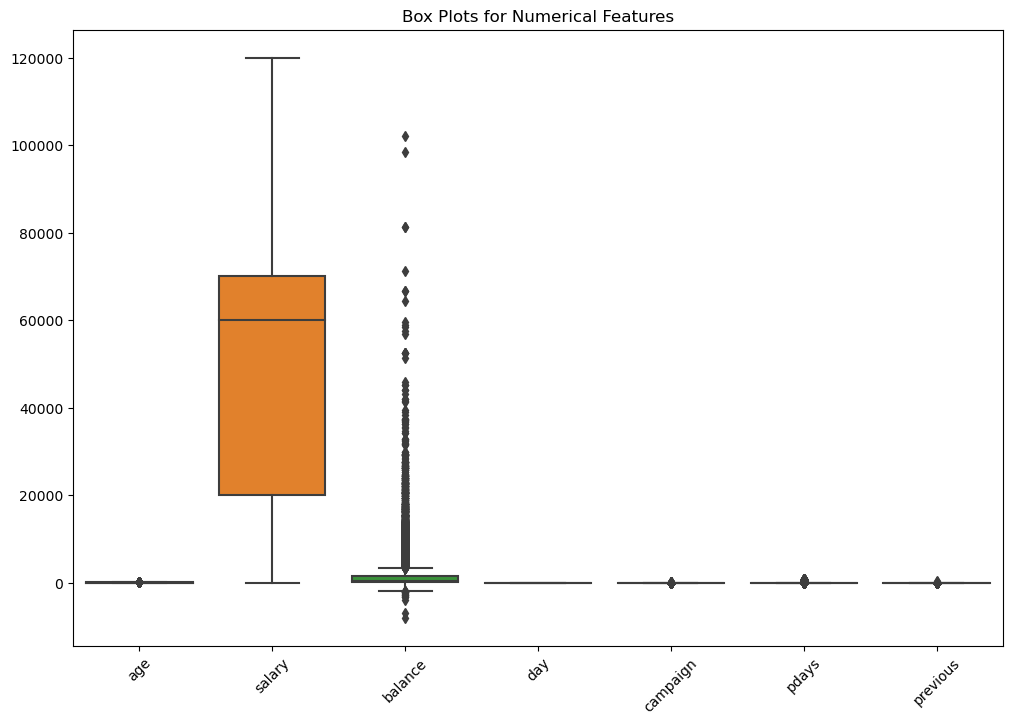

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# List of numerical columns
numerical_cols = ['age', 'salary', 'balance', 'day', 'campaign', 'pdays', 'previous']

# Create box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_cols])
plt.title('Box Plots for Numerical Features')
plt.xticks(rotation=45)
plt.show()

Analyzing the Box Plots
Interpreting Outliers:

Based on the box plots, we can identify potential outliers as data points that lie outside the whiskers (the lines extending from the boxes). These points are represented by individual dots.

Key Observations:

Salary: The salary column appears to have a few high outliers, indicated by the dots above the upper whisker.
Balance: The balance column also shows some outliers, both above and below the whiskers.
Other Columns: The remaining columns (age, day, campaign, pdays, and previous) seem to have a relatively smaller number of outliers.

count     45211.000000
mean      57006.171065
std       32085.718415
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64
count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


<Axes: xlabel='salary', ylabel='Count'>

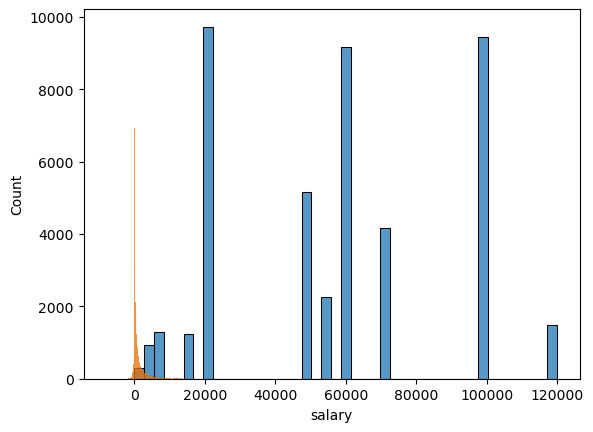

In [102]:

# Descriptive statistics
print(df['salary'].describe())
print(df['balance'].describe())

# Visualization
import seaborn as sns
sns.histplot(df['salary'])
sns.histplot(df['balance'])

In [ ]:
Salary: The salary distribution is skewed to the right, with a larger proportion of individuals earning lower salaries. 
There might be a few individuals with significantly higher salaries.
As indicated by the relatively high maximum value and the standard deviation.

Balance: The balance distribution appears to be more centered, with a median of 448. 
The negative minimum value suggests that some individuals have negative balances, possibly due to debt. 
The standard deviation is relatively high, indicating a wide range of balances.

Handling the outliers

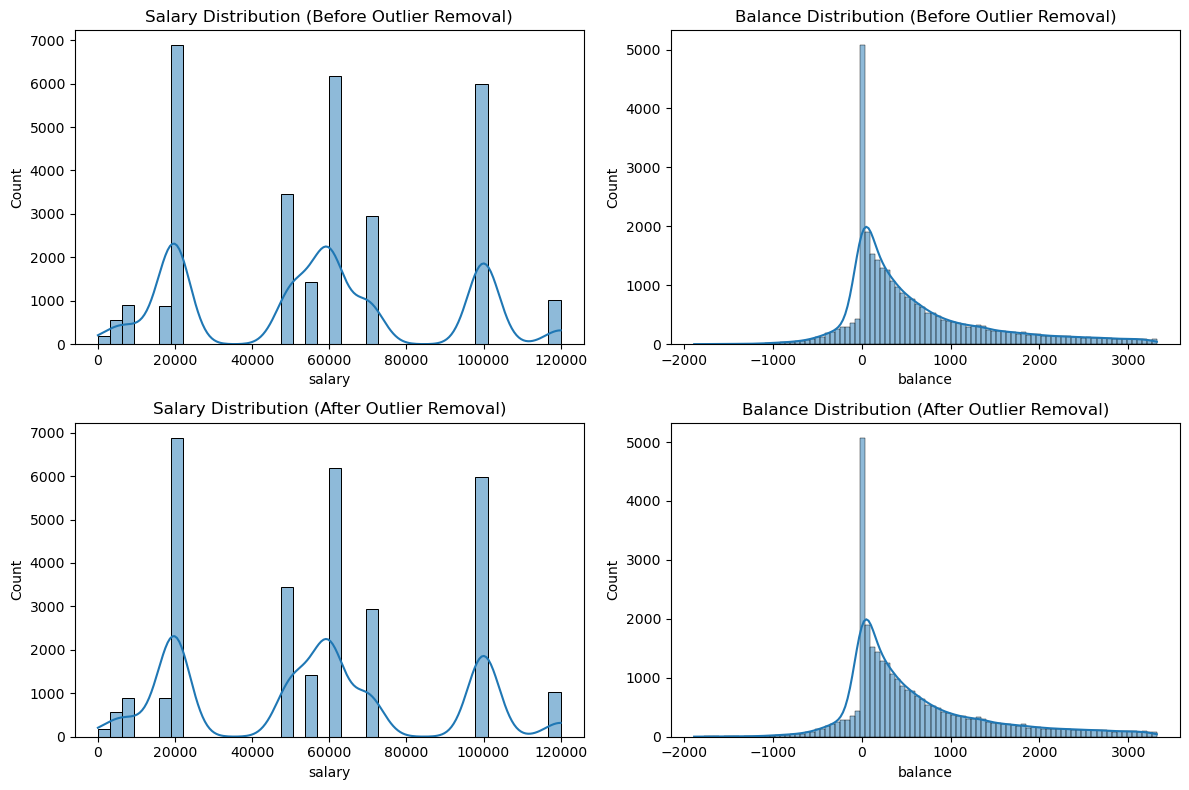

In [16]:
# For salary
Q1_salary = df['salary'].quantile(0.25)
Q3_salary = df['salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

df = df[(df['salary'] >= Q1_salary - 1.5 * IQR_salary) & (df['salary'] <= Q3_salary + 1.5 * IQR_salary)]

# For balance
Q1_balance = df['balance'].quantile(0.25)
Q3_balance = df['balance'].quantile(0.75)
IQR_balance = Q3_balance - Q1_balance

df = df[(df['balance'] >= Q1_balance - 1.5 * IQR_balance) & (df['balance'] <= Q3_balance + 1.5 * IQR_balance)]

# Visualize the distributions before and after outlier removal
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Before outlier removal
sns.histplot(df['salary'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Salary Distribution (Before Outlier Removal)')
sns.histplot(df['balance'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Balance Distribution (Before Outlier Removal)')

# After outlier removal
sns.histplot(df['salary'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Salary Distribution (After Outlier Removal)')
sns.histplot(df['balance'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Balance Distribution (After Outlier Removal)')

plt.tight_layout()
plt.show()

This code first removes outliers from the "salary" and "balance" columns using the IQR method. Then, it visualizes the distributions of these columns before and after outlier removal using histograms and KDE plots. This allows you to visually assess the impact of outlier removal on the data distribution.